In [3]:
import numpy as np
import kaggle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge


import sklearn
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU

import csv
from keras.models import load_model

In [7]:
################################################################
# load housing data
def load_housing_data():
    train_x = np.load('../../Data/Housing/train_x.npy')
    train_y = np.load('../../Data/Housing/train_y.npy')
    test_x = np.load('../../Data/Housing/test_x.npy')
    return train_x, train_y, test_x
################################################################

In [8]:
################################################################
# Compute MSE
def compute_MSE(y, y_hat):
        # mean squared error
        return np.mean(np.power(y - y_hat, 2))
################################################################

In [9]:
train_x, train_y, test_x = load_housing_data()

In [93]:
model = Sequential()
model.add(Dense(165, input_dim=12, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(165, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(165, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 165)               2145      
_________________________________________________________________
dropout_23 (Dropout)         (None, 165)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 165)               27390     
_________________________________________________________________
dropout_24 (Dropout)         (None, 165)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 165)               27390     
_________________________________________________________________
dropout_25 (Dropout)         (None, 165)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)               

In [94]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='loss', min_delta=0.00001, patience=250, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [95]:
history = model.fit(train_x, train_y, epochs=10000, batch_size=1000, verbose=1,callbacks=callbacks_list)

Epoch 1/10000
6325/6325 [==============================] - 0s 23us/step - loss: 6970.5033
Epoch 2/10000
6325/6325 [==============================] - 0s 6us/step - loss: 5721.4556
Epoch 3/10000
6325/6325 [==============================] - 0s 6us/step - loss: 4917.8066
Epoch 4/10000
6325/6325 [==============================] - 0s 6us/step - loss: 4585.6905
Epoch 5/10000
6325/6325 [==============================] - 0s 6us/step - loss: 4388.4585
Epoch 6/10000
6325/6325 [==============================] - 0s 6us/step - loss: 4216.7593
Epoch 7/10000
6325/6325 [==============================] - 0s 6us/step - loss: 4056.4023
Epoch 8/10000
6325/6325 [==============================] - 0s 6us/step - loss: 3902.9341
Epoch 9/10000
6325/6325 [==============================] - 0s 6us/step - loss: 3756.8286
Epoch 10/10000
6325/6325 [==============================] - 0s 6us/step - loss: 3614.1126
Epoch 11/10000
6325/6325 [==============================] - 0s 6us/step - loss: 3479.7206
Epoch 12/10000
632

6325/6325 [==============================] - 0s 6us/step - loss: 342.9816
Epoch 184/10000
6325/6325 [==============================] - 0s 6us/step - loss: 340.2721
Epoch 185/10000
6325/6325 [==============================] - 0s 5us/step - loss: 341.8670
Epoch 186/10000
6325/6325 [==============================] - 0s 5us/step - loss: 342.1698
Epoch 187/10000
6325/6325 [==============================] - 0s 5us/step - loss: 341.9463
Epoch 188/10000
6325/6325 [==============================] - 0s 5us/step - loss: 342.7584
Epoch 189/10000
6325/6325 [==============================] - 0s 6us/step - loss: 342.9949
Epoch 190/10000
6325/6325 [==============================] - 0s 5us/step - loss: 340.9553
Epoch 191/10000
6325/6325 [==============================] - 0s 5us/step - loss: 340.8213
Epoch 192/10000
6325/6325 [==============================] - 0s 5us/step - loss: 343.0720
Epoch 193/10000
6325/6325 [==============================] - 0s 5us/step - loss: 340.5152
Epoch 194/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 20.0441
Epoch 367/10000
6325/6325 [==============================] - 0s 5us/step - loss: 19.8514
Epoch 368/10000
6325/6325 [==============================] - 0s 5us/step - loss: 19.9830
Epoch 369/10000
6325/6325 [==============================] - 0s 6us/step - loss: 20.2854
Epoch 370/10000
6325/6325 [==============================] - 0s 6us/step - loss: 20.4165
Epoch 371/10000
6325/6325 [==============================] - 0s 6us/step - loss: 20.2715
Epoch 372/10000
6325/6325 [==============================] - 0s 5us/step - loss: 19.6986
Epoch 373/10000
6325/6325 [==============================] - 0s 5us/step - loss: 20.1523
Epoch 374/10000
6325/6325 [==============================] - 0s 5us/step - loss: 20.0188
Epoch 375/10000
6325/6325 [==============================] - 0s 6us/step - loss: 19.5902
Epoch 376/10000
6325/6325 [==============================] - 0s 5us/step - loss: 20.2659
Epoch 377/10000
6325/6325 [==========

6325/6325 [==============================] - 0s 5us/step - loss: 18.4284
Epoch 551/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.4638
Epoch 552/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.2731
Epoch 553/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.8081
Epoch 554/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.5096
Epoch 555/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.4928
Epoch 556/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.4077
Epoch 557/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.2212
Epoch 558/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.5090
Epoch 559/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.8032
Epoch 560/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.3086
Epoch 561/10000
6325/6325 [==========

6325/6325 [==============================] - 0s 5us/step - loss: 17.3241
Epoch 735/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.1245
Epoch 736/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.1090
Epoch 737/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.0957
Epoch 738/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.6529
Epoch 739/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.8310
Epoch 740/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.6428
Epoch 741/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.0902
Epoch 742/10000
6325/6325 [==============================] - 0s 5us/step - loss: 18.0006
Epoch 743/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.7162
Epoch 744/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.7889
Epoch 745/10000
6325/6325 [==========

6325/6325 [==============================] - 0s 5us/step - loss: 16.8745
Epoch 919/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.6342
Epoch 920/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.6788
Epoch 921/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.2395
Epoch 922/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.0967
Epoch 923/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.3728
Epoch 924/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.3887
Epoch 925/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.3479
Epoch 926/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.0680
Epoch 927/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.2746
Epoch 928/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.9723
Epoch 929/10000
6325/6325 [==========

6325/6325 [==============================] - 0s 5us/step - loss: 16.7279
Epoch 1011/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.8405
Epoch 1012/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.9514
Epoch 1013/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.7864
Epoch 1014/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.1176
Epoch 1015/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.0175
Epoch 1016/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.1036
Epoch 1017/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.9486
Epoch 1018/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.3011
Epoch 1019/10000
6325/6325 [==============================] - 0s 5us/step - loss: 17.1576
Epoch 1020/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.8697
Epoch 1021/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 16.1437
Epoch 1193/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.5211
Epoch 1194/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.4857
Epoch 1195/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.9485
Epoch 1196/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.2150
Epoch 1197/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.4720
Epoch 1198/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.7036
Epoch 1199/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.2334
Epoch 1200/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.1533
Epoch 1201/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.1312
Epoch 1202/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.1621
Epoch 1203/10000
6325/6325 

6325/6325 [==============================] - 0s 6us/step - loss: 15.7704
Epoch 1375/10000
6325/6325 [==============================] - 0s 6us/step - loss: 16.1403
Epoch 1376/10000
6325/6325 [==============================] - 0s 6us/step - loss: 15.8449
Epoch 1377/10000
6325/6325 [==============================] - 0s 6us/step - loss: 16.3354
Epoch 1378/10000
6325/6325 [==============================] - 0s 6us/step - loss: 16.1632
Epoch 1379/10000
6325/6325 [==============================] - 0s 6us/step - loss: 16.2045
Epoch 1380/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.0772
Epoch 1381/10000
6325/6325 [==============================] - 0s 6us/step - loss: 15.6832
Epoch 1382/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.8000
Epoch 1383/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.8346
Epoch 1384/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.7649
Epoch 1385/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 15.7673
Epoch 1557/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.7185
Epoch 1558/10000
6325/6325 [==============================] - 0s 5us/step - loss: 16.0410
Epoch 1559/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.7615
Epoch 1560/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.4808
Epoch 1561/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3603
Epoch 1562/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.5227
Epoch 1563/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.6598
Epoch 1564/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.1743
Epoch 1565/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.8686
Epoch 1566/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.5341
Epoch 1567/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 15.4463
Epoch 1739/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3897
Epoch 1740/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.1792
Epoch 1741/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.0135
Epoch 1742/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.4880
Epoch 1743/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3813
Epoch 1744/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.5766
Epoch 1745/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3295
Epoch 1746/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.6029
Epoch 1747/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8394
Epoch 1748/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9064
Epoch 1749/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 14.6449
Epoch 1921/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8663
Epoch 1922/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9559
Epoch 1923/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.0748
Epoch 1924/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8580
Epoch 1925/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3276
Epoch 1926/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9359
Epoch 1927/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8023
Epoch 1928/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.2904
Epoch 1929/10000
6325/6325 [==============================] - 0s 5us/step - loss: 15.3640
Epoch 1930/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.6191
Epoch 1931/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 14.7965
Epoch 2103/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8731
Epoch 2104/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.6783
Epoch 2105/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9817
Epoch 2106/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.7832
Epoch 2107/10000
6325/6325 [==============================] - 0s 6us/step - loss: 14.7814
Epoch 2108/10000
6325/6325 [==============================] - 0s 6us/step - loss: 14.8117
Epoch 2109/10000
6325/6325 [==============================] - 0s 6us/step - loss: 14.5276
Epoch 2110/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.6401
Epoch 2111/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9990
Epoch 2112/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.9095
Epoch 2113/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 14.5713
Epoch 2285/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.3322
Epoch 2286/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.8640
Epoch 2287/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.5192
Epoch 2288/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.3598
Epoch 2289/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.4195
Epoch 2290/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1417
Epoch 2291/10000
6325/6325 [==============================] - 0s 6us/step - loss: 14.3421
Epoch 2292/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.4514
Epoch 2293/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0546
Epoch 2294/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.3429
Epoch 2295/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 14.0424
Epoch 2467/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1206
Epoch 2468/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.3334
Epoch 2469/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.4395
Epoch 2470/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0864
Epoch 2471/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1369
Epoch 2472/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1888
Epoch 2473/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1455
Epoch 2474/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.8158
Epoch 2475/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.2474
Epoch 2476/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.4037
Epoch 2477/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 14.0865
Epoch 2649/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.9354
Epoch 2650/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1793
Epoch 2651/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.8020
Epoch 2652/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0007
Epoch 2653/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0163
Epoch 2654/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.5883
Epoch 2655/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1166
Epoch 2656/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0612
Epoch 2657/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.1347
Epoch 2658/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.2264
Epoch 2659/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 13.9327
Epoch 2831/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.6100
Epoch 2832/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3321
Epoch 2833/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.7899
Epoch 2834/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1695
Epoch 2835/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.9596
Epoch 2836/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.7514
Epoch 2837/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0978
Epoch 2838/10000
6325/6325 [==============================] - 0s 5us/step - loss: 14.0507
Epoch 2839/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.7133
Epoch 2840/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3997
Epoch 2841/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 13.2552
Epoch 3013/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2177
Epoch 3014/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3717
Epoch 3015/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1313
Epoch 3016/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.4516
Epoch 3017/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3157
Epoch 3018/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3431
Epoch 3019/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1959
Epoch 3020/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1185
Epoch 3021/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.5644
Epoch 3022/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.6969
Epoch 3023/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 13.1380
Epoch 3195/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3223
Epoch 3196/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0556
Epoch 3197/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2126
Epoch 3198/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2348
Epoch 3199/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1278
Epoch 3200/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2676
Epoch 3201/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2135
Epoch 3202/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.1295
Epoch 3203/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2301
Epoch 3204/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2768
Epoch 3205/10000
6325/6325 

Epoch 3285/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0965
Epoch 3286/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0429
Epoch 3287/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.2798
Epoch 3288/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8428
Epoch 3289/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.7911
Epoch 3290/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.7871
Epoch 3291/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.3217
Epoch 3292/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9351
Epoch 3293/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9888
Epoch 3294/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9895
Epoch 3295/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0776
Epoch 3296

6325/6325 [==============================] - 0s 5us/step - loss: 12.7501
Epoch 3377/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8147
Epoch 3378/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9849
Epoch 3379/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0751
Epoch 3380/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8072
Epoch 3381/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6492
Epoch 3382/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9585
Epoch 3383/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9878
Epoch 3384/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.0460
Epoch 3385/10000
6325/6325 [==============================] - 0s 5us/step - loss: 13.4867
Epoch 3386/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8914
Epoch 3387/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 12.5972
Epoch 3559/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8693
Epoch 3560/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8524
Epoch 3561/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.5700
Epoch 3562/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6423
Epoch 3563/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6293
Epoch 3564/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.5275
Epoch 3565/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.9678
Epoch 3566/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8654
Epoch 3567/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.7666
Epoch 3568/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8445
Epoch 3569/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 12.8078
Epoch 3741/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.7442
Epoch 3742/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.5490
Epoch 3743/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.7025
Epoch 3744/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.2838
Epoch 3745/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.5507
Epoch 3746/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3692
Epoch 3747/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.4244
Epoch 3748/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6174
Epoch 3749/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6051
Epoch 3750/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.8348
Epoch 3751/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 12.3131
Epoch 3923/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.2413
Epoch 3924/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6918
Epoch 3925/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.4352
Epoch 3926/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.6555
Epoch 3927/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0615
Epoch 3928/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0368
Epoch 3929/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.5660
Epoch 3930/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3233
Epoch 3931/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1799
Epoch 3932/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9265
Epoch 3933/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 11.9953
Epoch 4104/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3874
Epoch 4105/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3514
Epoch 4106/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3170
Epoch 4107/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9504
Epoch 4108/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.4122
Epoch 4109/10000
6325/6325 [==============================] - 0s 6us/step - loss: 12.6750
Epoch 4110/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9554
Epoch 4111/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0599
Epoch 4112/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0703
Epoch 4113/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1722
Epoch 4114/10000
6325/6325 

6325/6325 [==============================] - 0s 6us/step - loss: 12.2316
Epoch 4286/10000
6325/6325 [==============================] - 0s 6us/step - loss: 12.3991
Epoch 4287/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6935
Epoch 4288/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.2697
Epoch 4289/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7754
Epoch 4290/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0208
Epoch 4291/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9185
Epoch 4292/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.8233
Epoch 4293/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3706
Epoch 4294/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.3530
Epoch 4295/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1063
Epoch 4296/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 11.7095
Epoch 4468/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9054
Epoch 4469/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.8340
Epoch 4470/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7679
Epoch 4471/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.8162
Epoch 4472/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9604
Epoch 4473/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7734
Epoch 4474/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.0192
Epoch 4475/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1209
Epoch 4476/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7337
Epoch 4477/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1494
Epoch 4478/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 11.5591
Epoch 4650/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9149
Epoch 4651/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.5966
Epoch 4652/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3050
Epoch 4653/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7395
Epoch 4654/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7790
Epoch 4655/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.8528
Epoch 4656/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.8646
Epoch 4657/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6313
Epoch 4658/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.4719
Epoch 4659/10000
6325/6325 [==============================] - 0s 5us/step - loss: 12.1366
Epoch 4660/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 11.6931
Epoch 4832/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3616
Epoch 4833/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.9067
Epoch 4834/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6202
Epoch 4835/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7117
Epoch 4836/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7212
Epoch 4837/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6585
Epoch 4838/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.5287
Epoch 4839/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.5760
Epoch 4840/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.5878
Epoch 4841/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3791
Epoch 4842/10000
6325/6325 

6325/6325 [==============================] - 0s 6us/step - loss: 11.3637
Epoch 5014/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.1512
Epoch 5015/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.7805
Epoch 5016/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.2611
Epoch 5017/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2696
Epoch 5018/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6584
Epoch 5019/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.4544
Epoch 5020/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3888
Epoch 5021/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.6063
Epoch 5022/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3577
Epoch 5023/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2560
Epoch 5024/10000
6325/6325 

6325/6325 [==============================] - 0s 6us/step - loss: 11.3281
Epoch 5196/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.5805
Epoch 5197/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.4617
Epoch 5198/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.3338
Epoch 5199/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.5378
Epoch 5200/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.3922
Epoch 5201/10000
6325/6325 [==============================] - 0s 6us/step - loss: 11.5842
Epoch 5202/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3681
Epoch 5203/10000
6325/6325 [==============================] - 0s 6us/step - loss: 10.9710
Epoch 5204/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.4362
Epoch 5205/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3589
Epoch 5206/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 11.4312
Epoch 5378/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1597
Epoch 5379/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2062
Epoch 5380/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1682
Epoch 5381/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1493
Epoch 5382/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.4362
Epoch 5383/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.0238
Epoch 5384/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3654
Epoch 5385/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2656
Epoch 5386/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.3653
Epoch 5387/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.4538
Epoch 5388/10000
6325/6325 

6325/6325 [==============================] - 0s 5us/step - loss: 10.6936
Epoch 5560/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2063
Epoch 5561/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.2191
Epoch 5562/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1210
Epoch 5563/10000
6325/6325 [==============================] - 0s 5us/step - loss: 10.9564
Epoch 5564/10000
6325/6325 [==============================] - 0s 5us/step - loss: 10.9724
Epoch 5565/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1093
Epoch 5566/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1954
Epoch 5567/10000
6325/6325 [==============================] - 0s 5us/step - loss: 10.7285
Epoch 5568/10000
6325/6325 [==============================] - 0s 5us/step - loss: 11.1227
Epoch 5569/10000
6325/6325 [==============================] - 0s 5us/step - loss: 10.9855
Epoch 5570/10000
6325/6325 

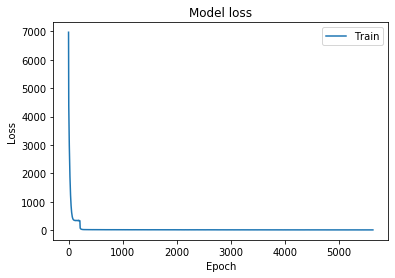

In [96]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [97]:
y_1 = model.predict(train_x)
y_1 = y_1.reshape(len(y_1),1)
train_y = train_y.reshape(len(train_y),1)

In [98]:
compute_MSE(y_1, train_y)

4.505389406586231

In [100]:
compute_MSE(y_1, train_y)

4.505389406586231

In [107]:
y_2 = model.predict(test_x)
y_2 = y_2.reshape(len(y_2),1)

In [108]:
cheese = np.concatenate((test_x,y_2),axis=1)
pred = np.concatenate((train_x,y_1),axis=1)
newdata = np.concatenate((pred,cheese),axis=0)

In [109]:
np.save('synthethic_data.npy',newdata)

In [4]:
model=load_model('best.h5')

In [5]:
def kaggleize(predictions,file,float_flag):

	if(len(predictions.shape)==1):
		predictions.shape = [predictions.shape[0],1]

	ids = 1 + np.arange(predictions.shape[0])[None].T
	if float_flag:
		kaggle_predictions = np.hstack((ids,predictions)).astype(float)
	else:
		kaggle_predictions = np.hstack((ids,predictions)).astype(int)

	writer = csv.writer(open(file, 'w'))
	if predictions.shape[1] == 1:
		writer.writerow(['# id','Prediction'])
	elif predictions.shape[1] == 2:
		writer.writerow(['# id','Prediction1', 'Prediction2'])
	writer.writerows(kaggle_predictions)

In [10]:
kaggleize(model.predict(test_x),'submission.csv',True)

In [99]:
model.save('best.h5')